<center><h1><b><font size="6">Python Machine Learning Financial Analysis</font></b></h1></center>

#### Import Libraries

In [9]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt

#### Load the data

In [57]:
data = pd.read_excel('./data/default_of_credit_card_clients.xls', header=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Information about the different columns:



**ID**: Account ID

**LIMIT_BAL**: Credit limit (in New Taiwanese dollars (NT)) including both individual and family (supplementary) credit

**SEX**: 1 = male; 2 = female

**EDUCATION**: 1 = graduate school; 2 = university; 3 = high school; 4 = others

**MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others)

**AGE**: Age

**PAY_1 - PAY_6**: History of past payments. History from April to September. The rating scale is as follows: -2 = No consumption; -1 = Paid in full; 0 = The use of revolving credit; 1 = Payment delay for one month; 2 = Payment delay for two months; and so on up to 9 = Payment delay for nine months and above

**BILL_AMT1 - BILL_AMT6**: Amount of bill statement. BILL_AMT1 represents the amount of the bill statement in September, and 
BILL_AMT6 represents the amount of the bill statement in April.

**PAY_AMT1 - PAY_AMT6**: Amount of previous payment (in NT dollars).

In [15]:
data.shape

(30000, 25)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

##### unique ID Values in the dataset

In [59]:
data['ID'].nunique()

30000

In [24]:
data['ID'].value_counts()

ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64

In [25]:
id_counts =data['ID'].value_counts()
id_counts[:3] # the first 3 

ID
1        1
19997    1
20009    1
Name: count, dtype: int64

In [26]:
id_counts.value_counts()

count
1    30000
Name: count, dtype: int64

In [20]:
# boolean mask
bool_mask = id_counts == 2
bool_mask[:5]

ID
1        False
19997    False
20009    False
20008    False
20007    False
Name: count, dtype: bool

#### Exploring financial history

In [60]:
data = pd.read_excel('./data/default_of_credit_card_clients.xls', header=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
data.shape

(30000, 25)

In [62]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### PAY Columns

In [68]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[pay_columns].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### allows you to see payment behavior, where most of the data and payment trends of credit card customers are concentrated. In this we know the maximum and minimum values, and it is observed that most of the customers are up to date with their payments since it reflects the highest concentration of data.

In [69]:
data[pay_columns[0]].value_counts().sort_index()

PAY_1
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

##### Grafic

<Axes: >

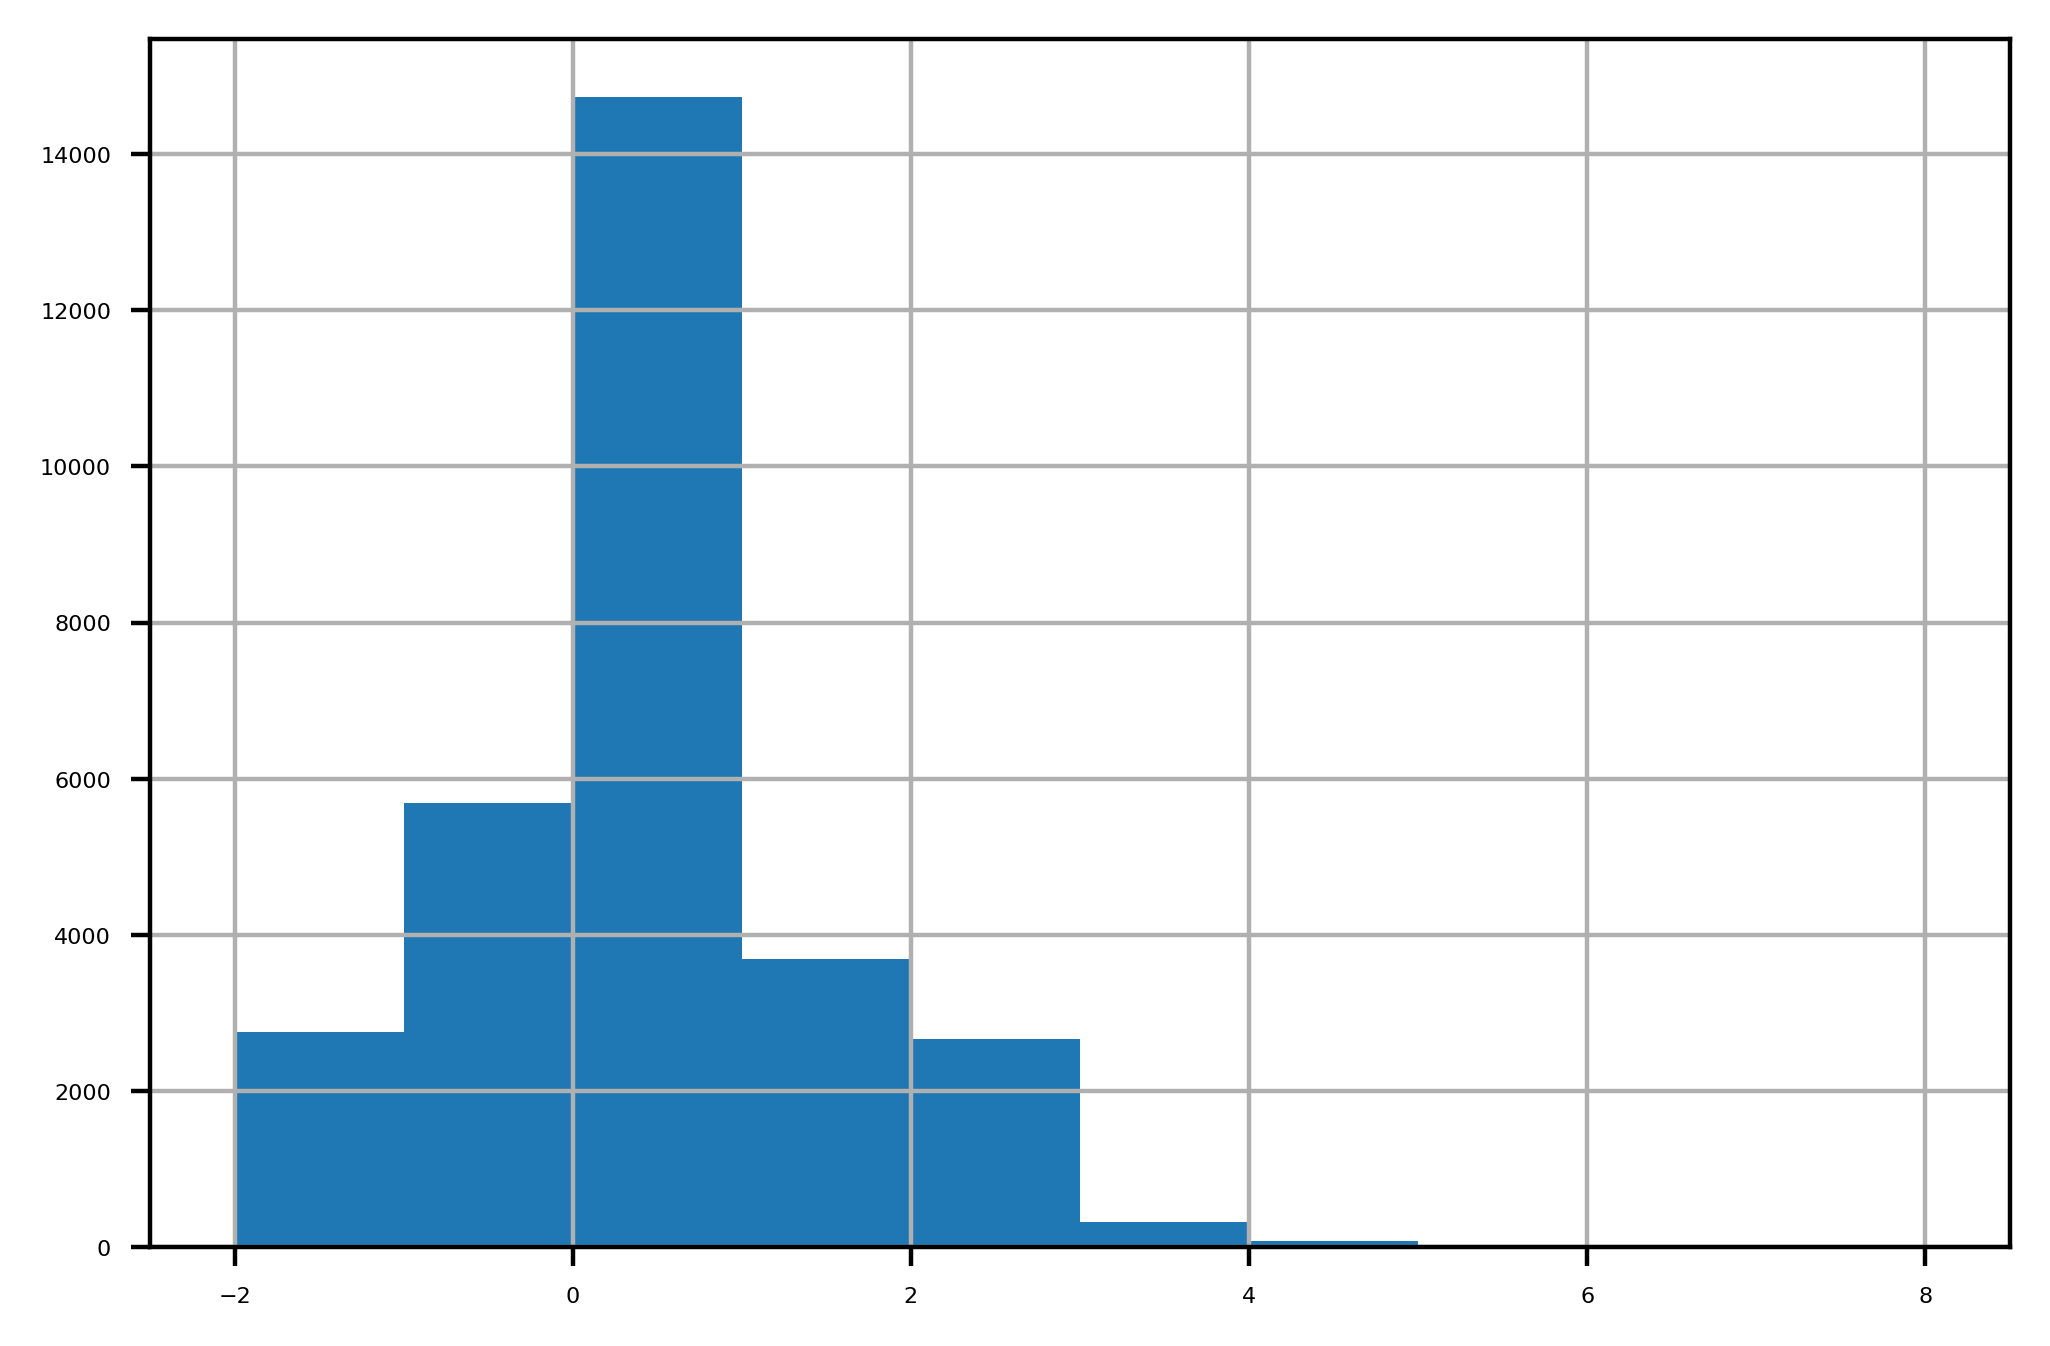

In [71]:
data[pay_columns[0]].hist()

##### 0 = represents loan payments 
##### 1 = represents non-payments, overdue


In [72]:
data['default payment next month'].value_counts()     

default payment next month
0    23364
1     6636
Name: count, dtype: int64

#### Every PAY column grafic

*we can see that from PAY_2 the information is not correct*.


array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

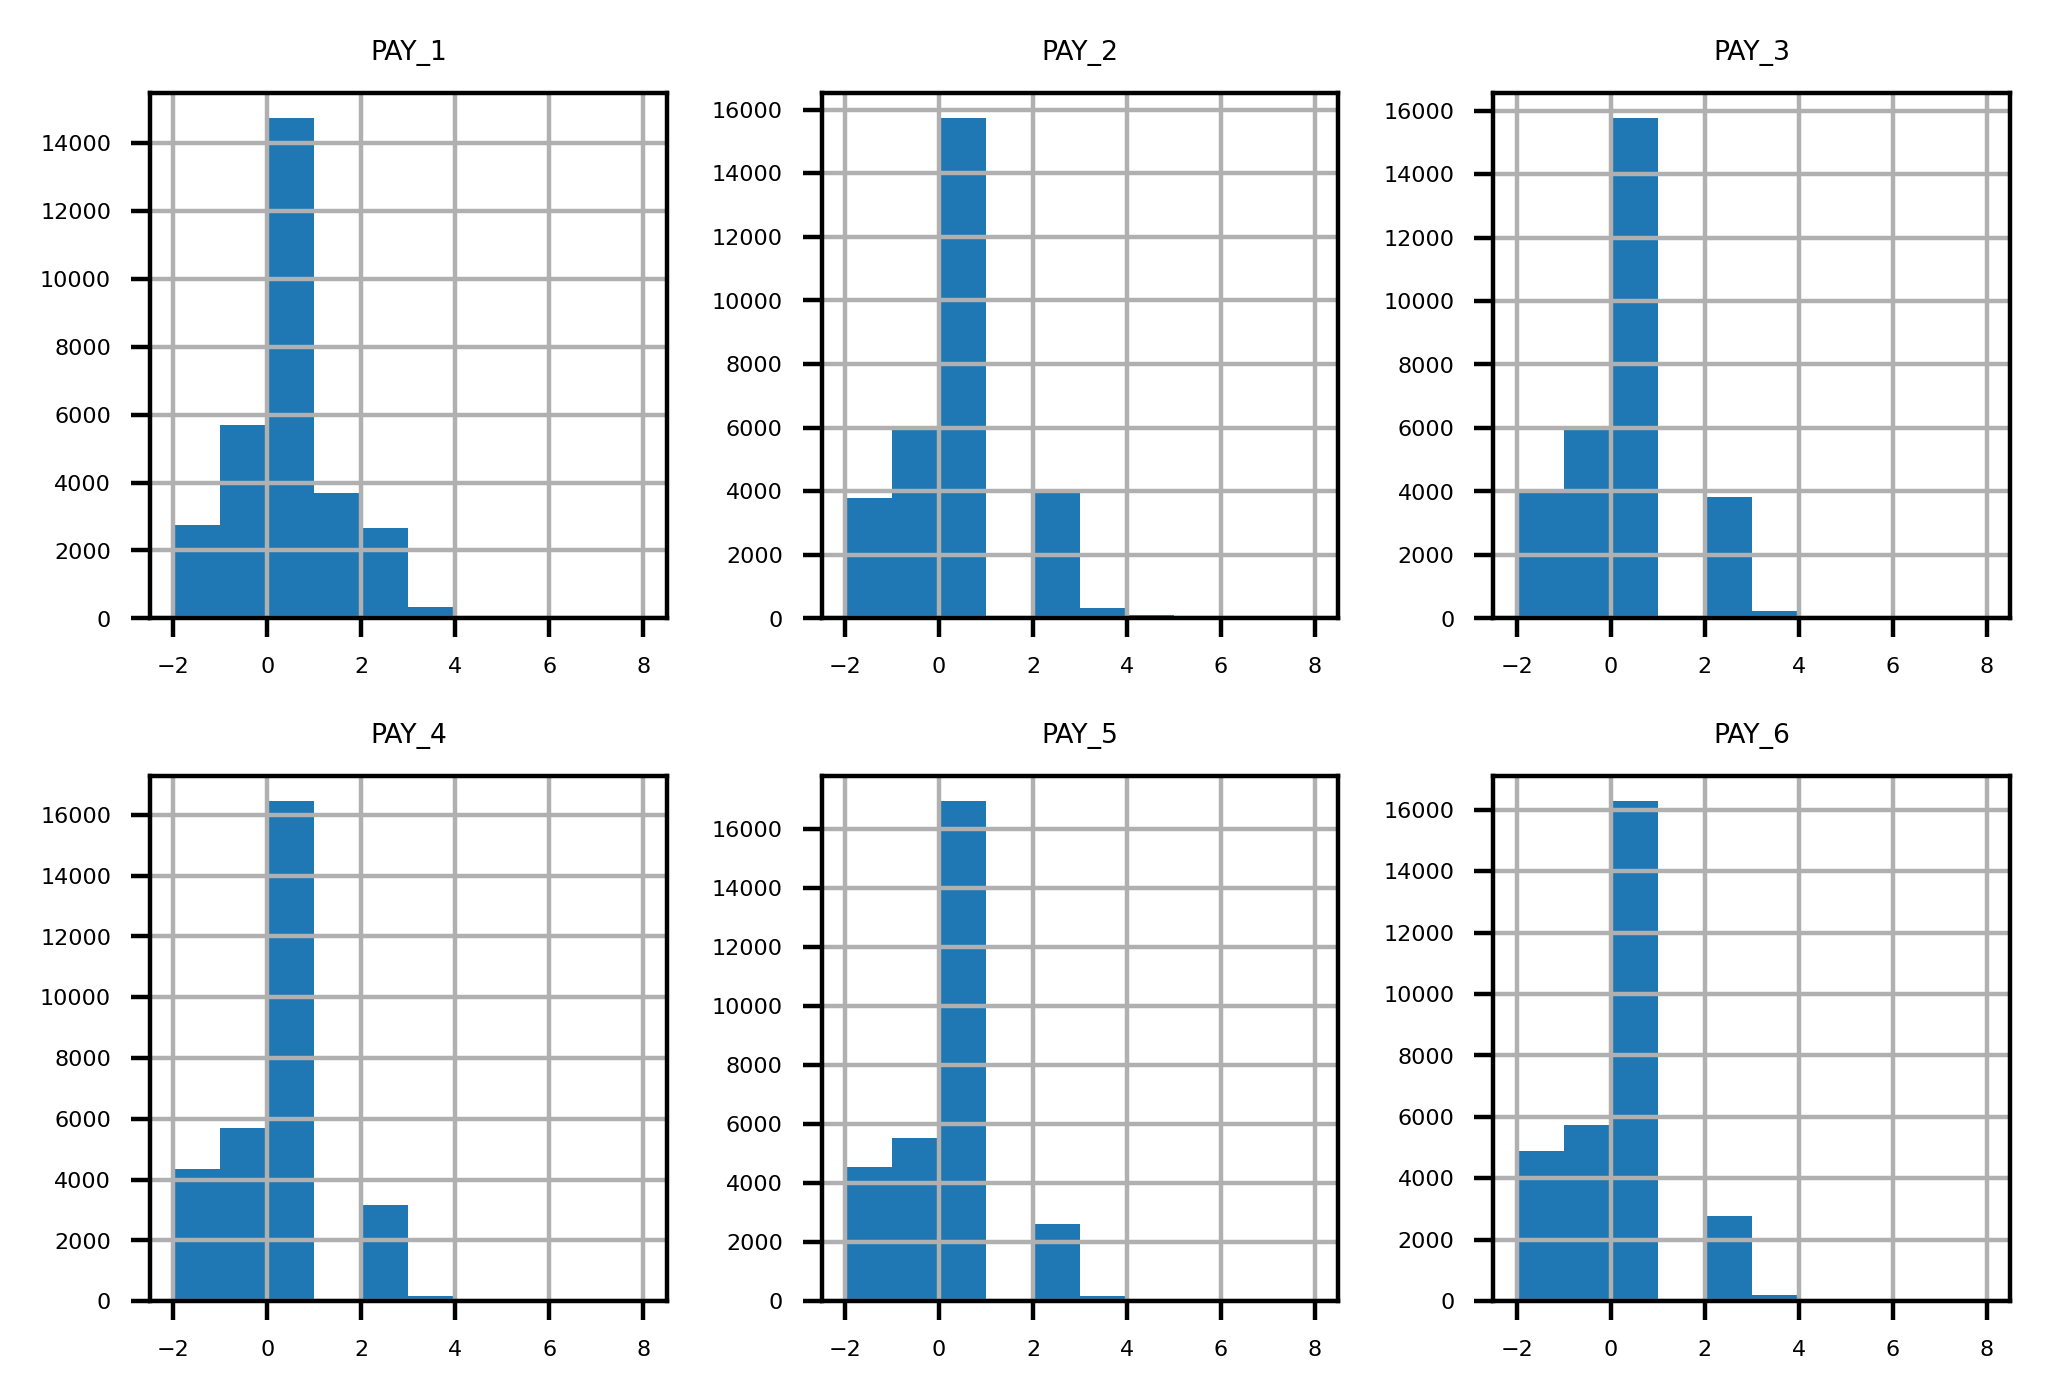

In [73]:
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 400 # high definition
mlp.rcParams['font.size'] = 4 # text size
data[pay_columns].hist(layout=(2, 3))

In [74]:
data.loc[data['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


##### the others columns

In [75]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [76]:
data[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


#### customer receipts

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

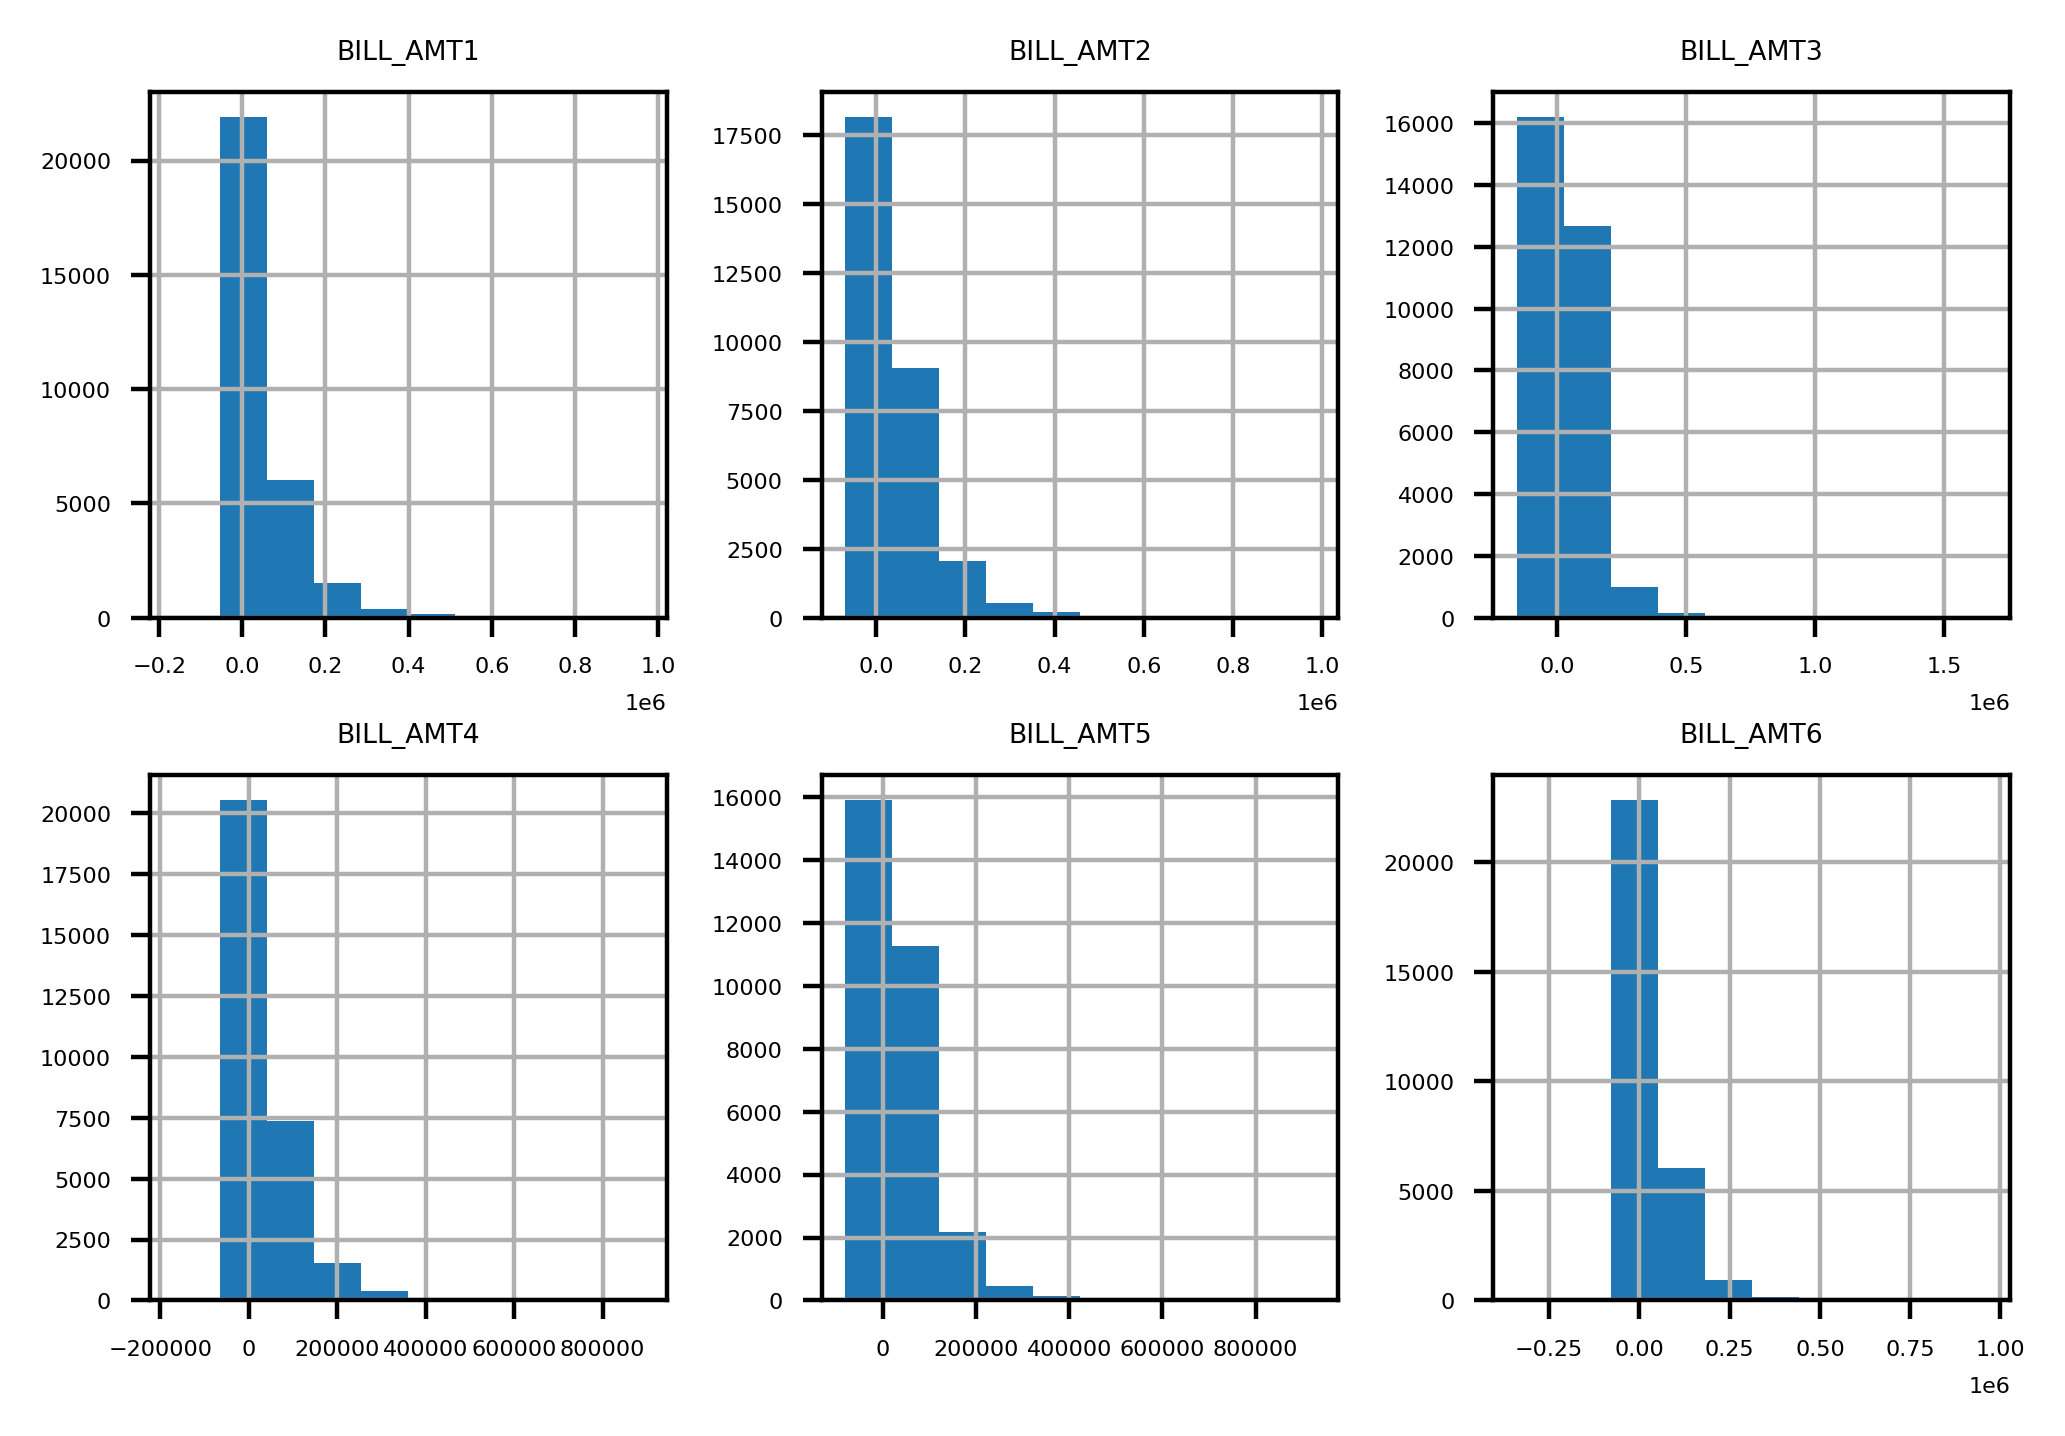

In [39]:
data[bill_feats].hist(layout=(2, 3))

#### customer payments

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

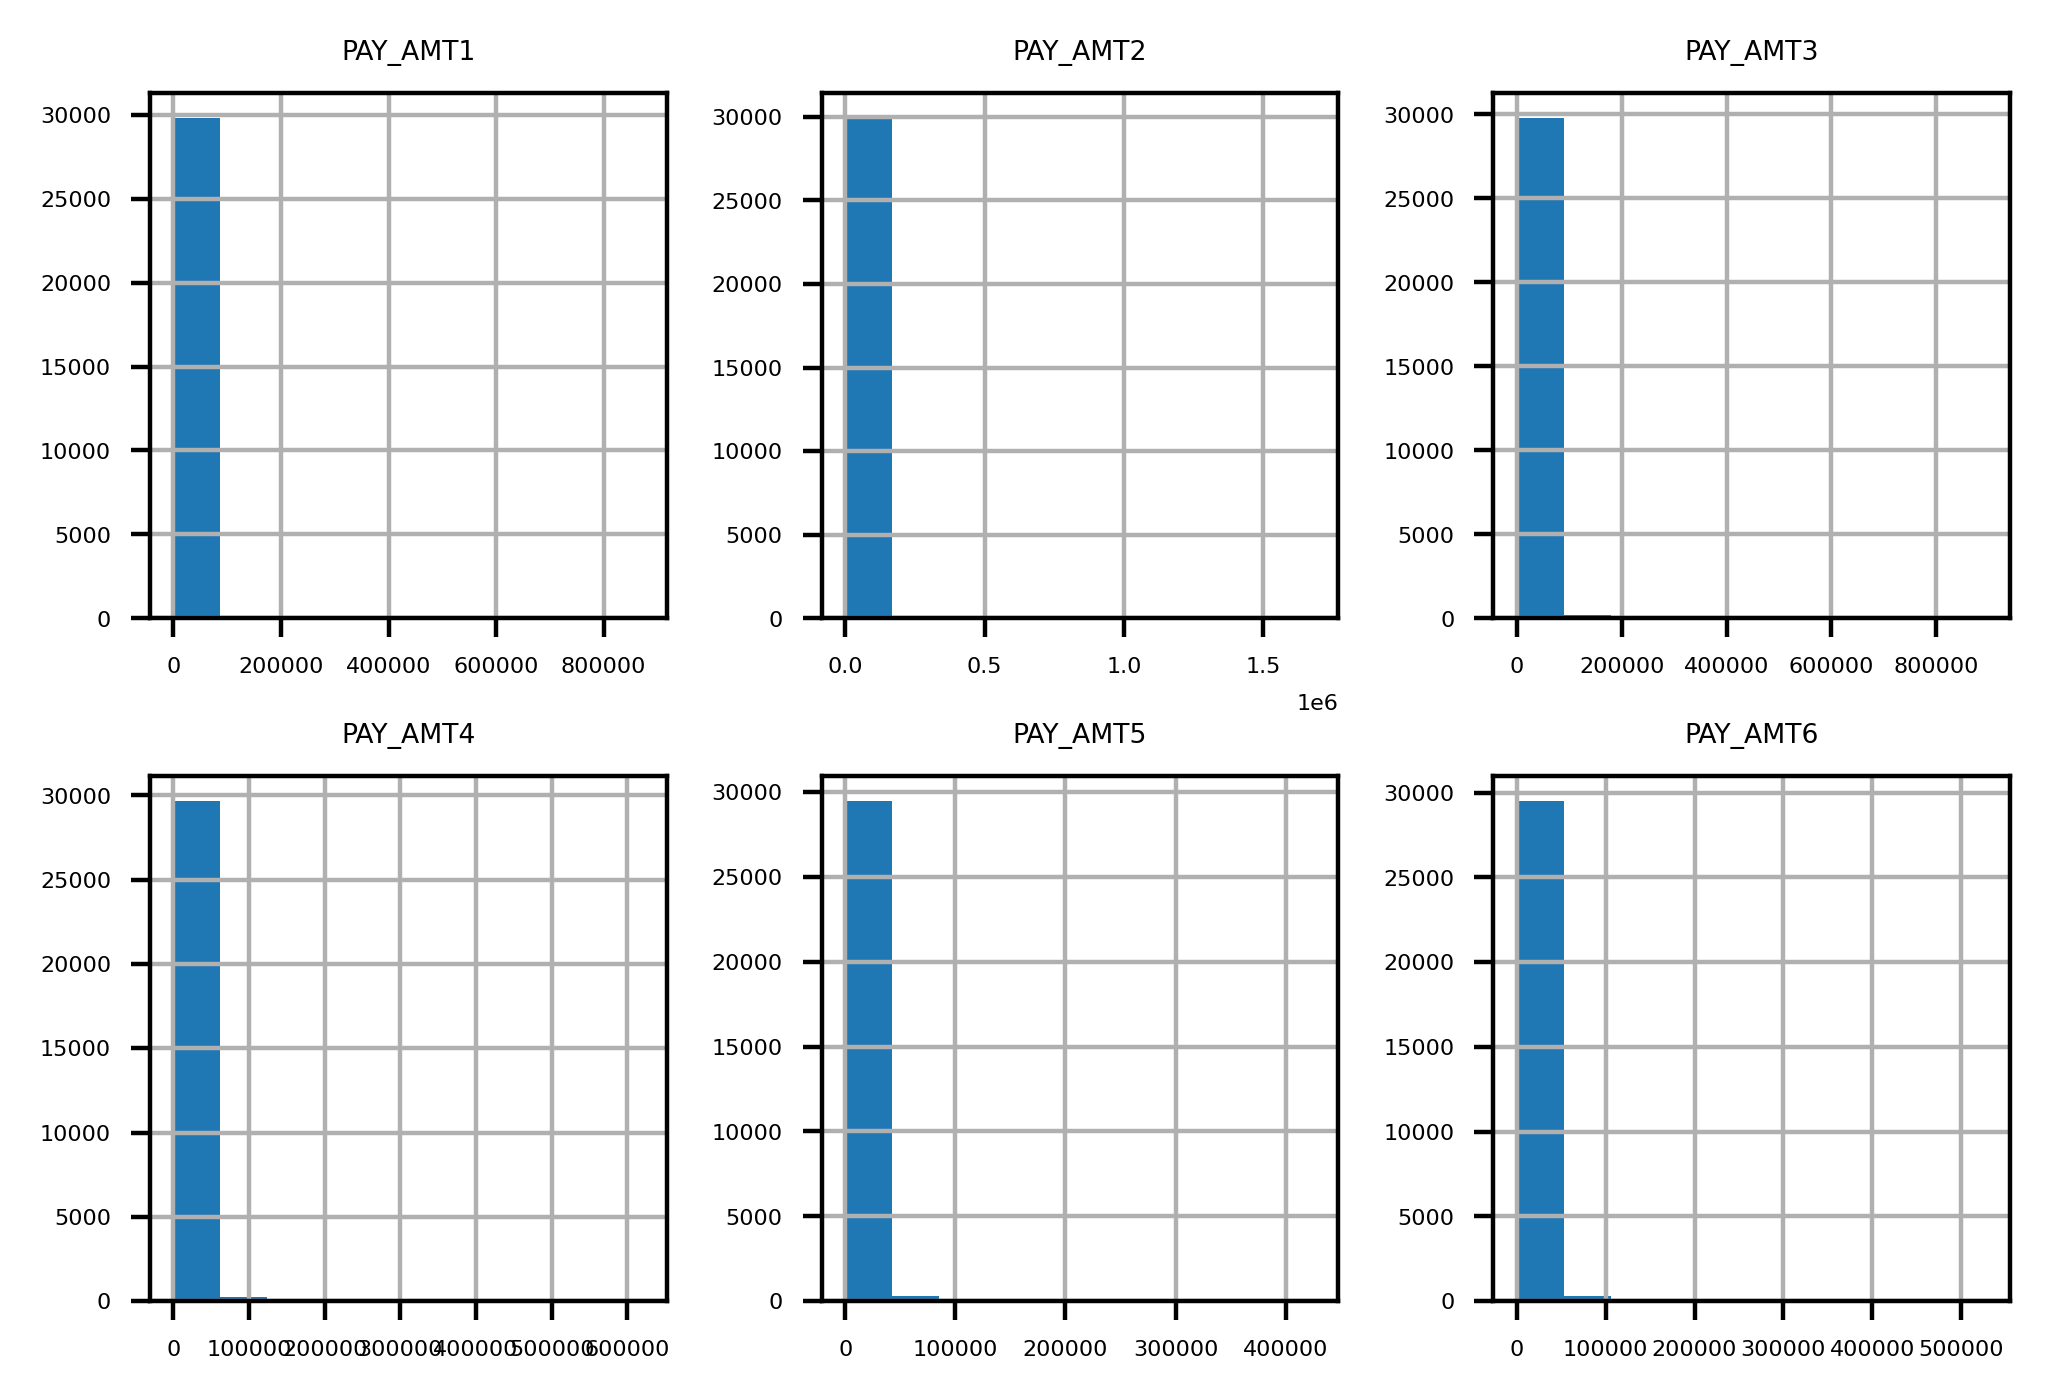

In [40]:
data[pay_amt_feats].hist(layout=(2, 3))

In [41]:
pay_zero_mask = data[pay_amt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    5249
PAY_AMT2    5396
PAY_AMT3    5968
PAY_AMT4    6408
PAY_AMT5    6703
PAY_AMT6    7173
dtype: int64

##### graphical payments representation without non-paying customers

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

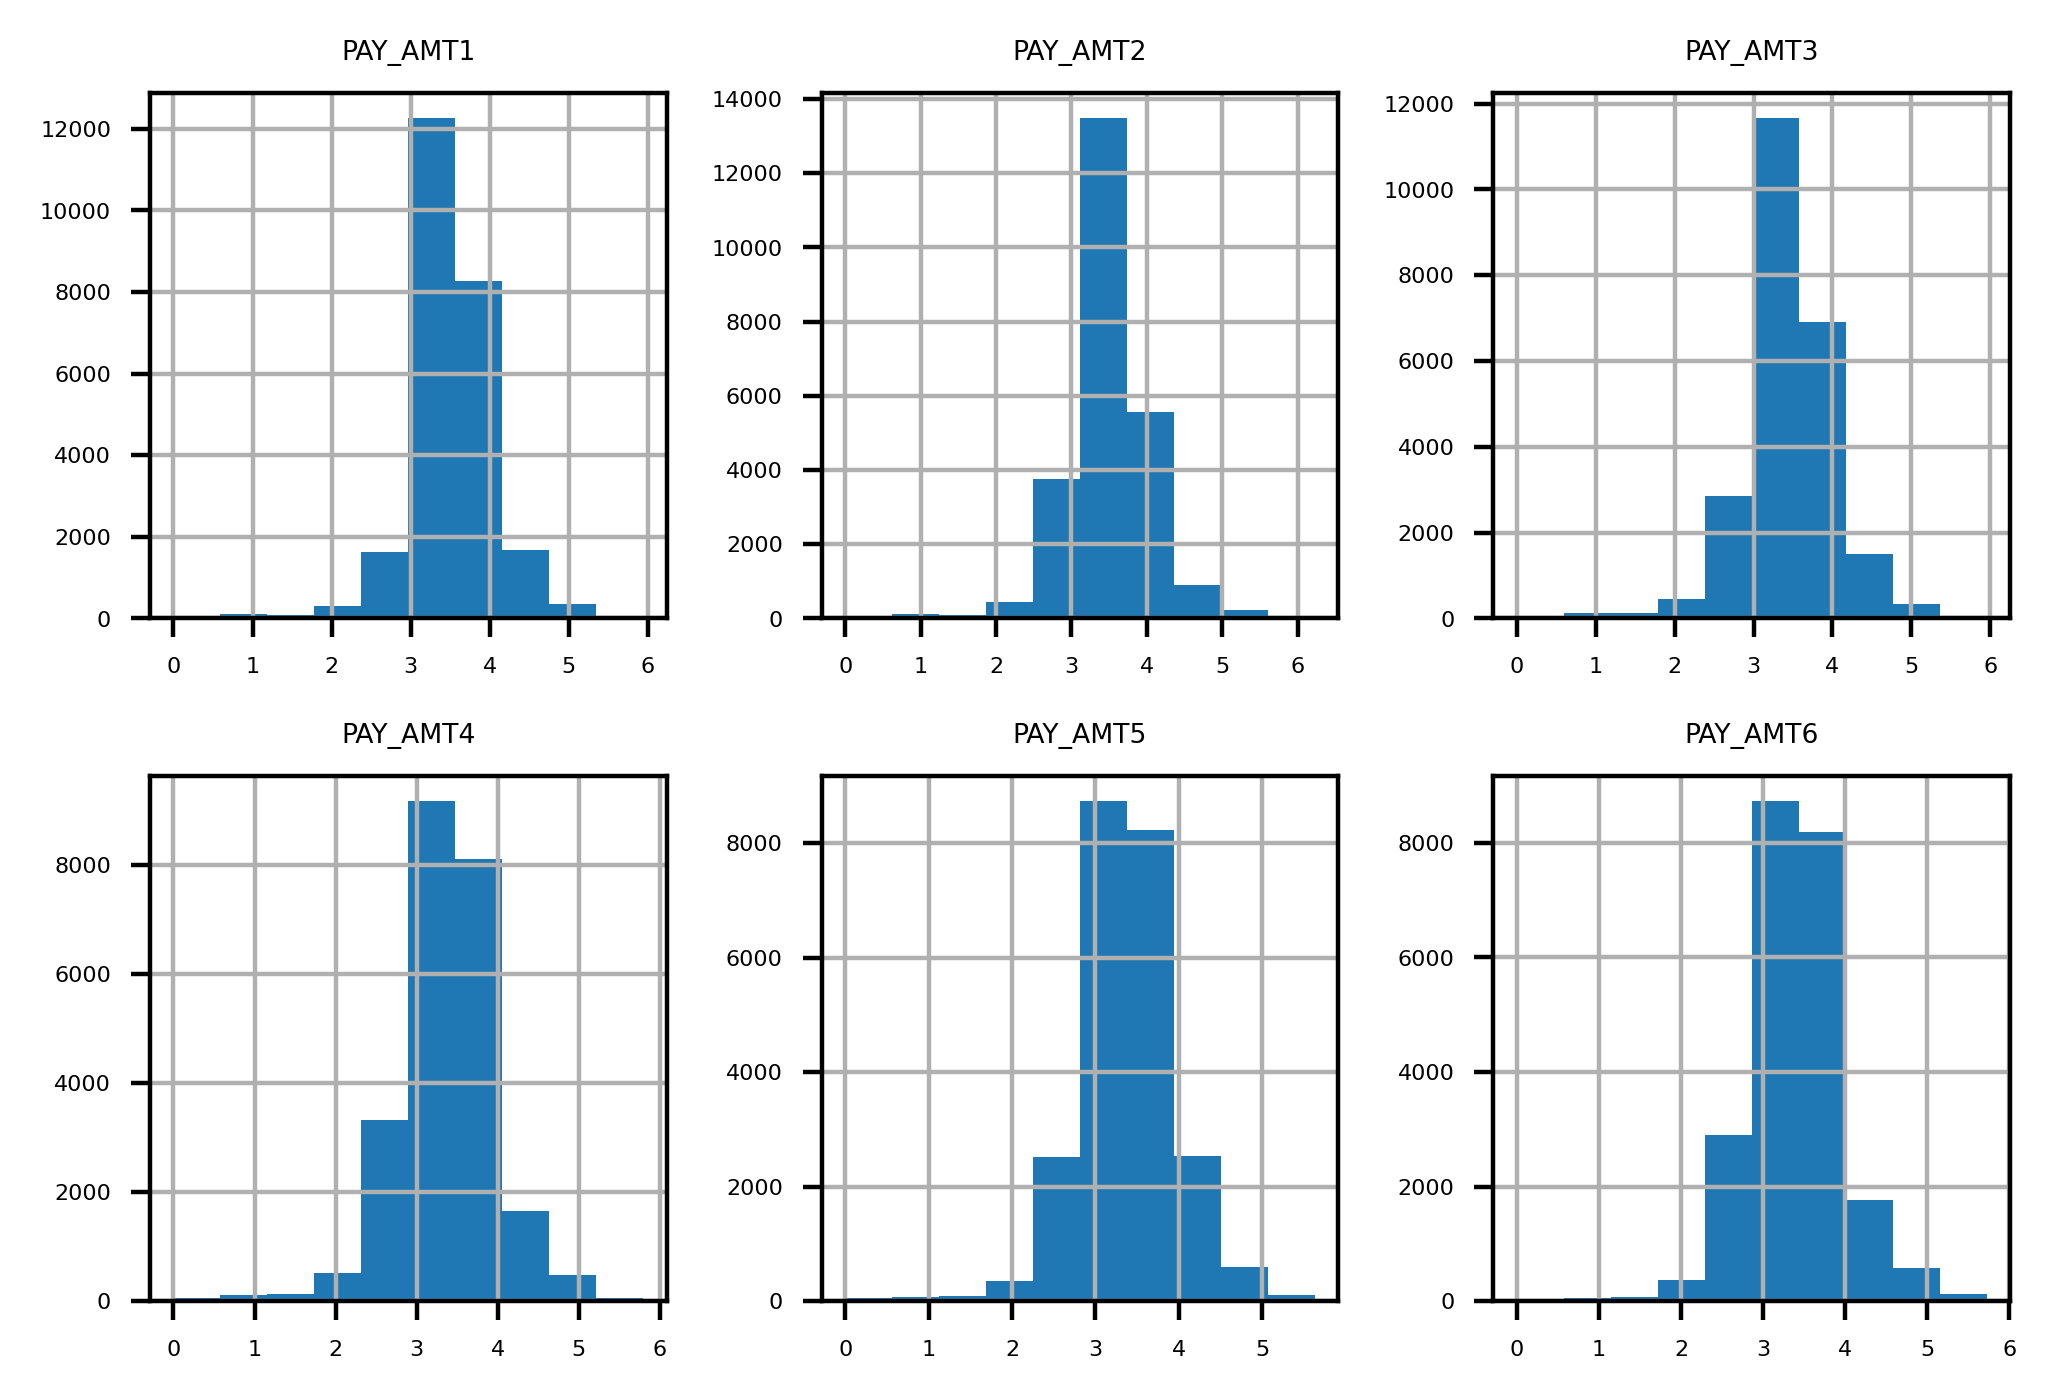

In [42]:
data[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2, 3))

#### credit limit column

<Axes: >

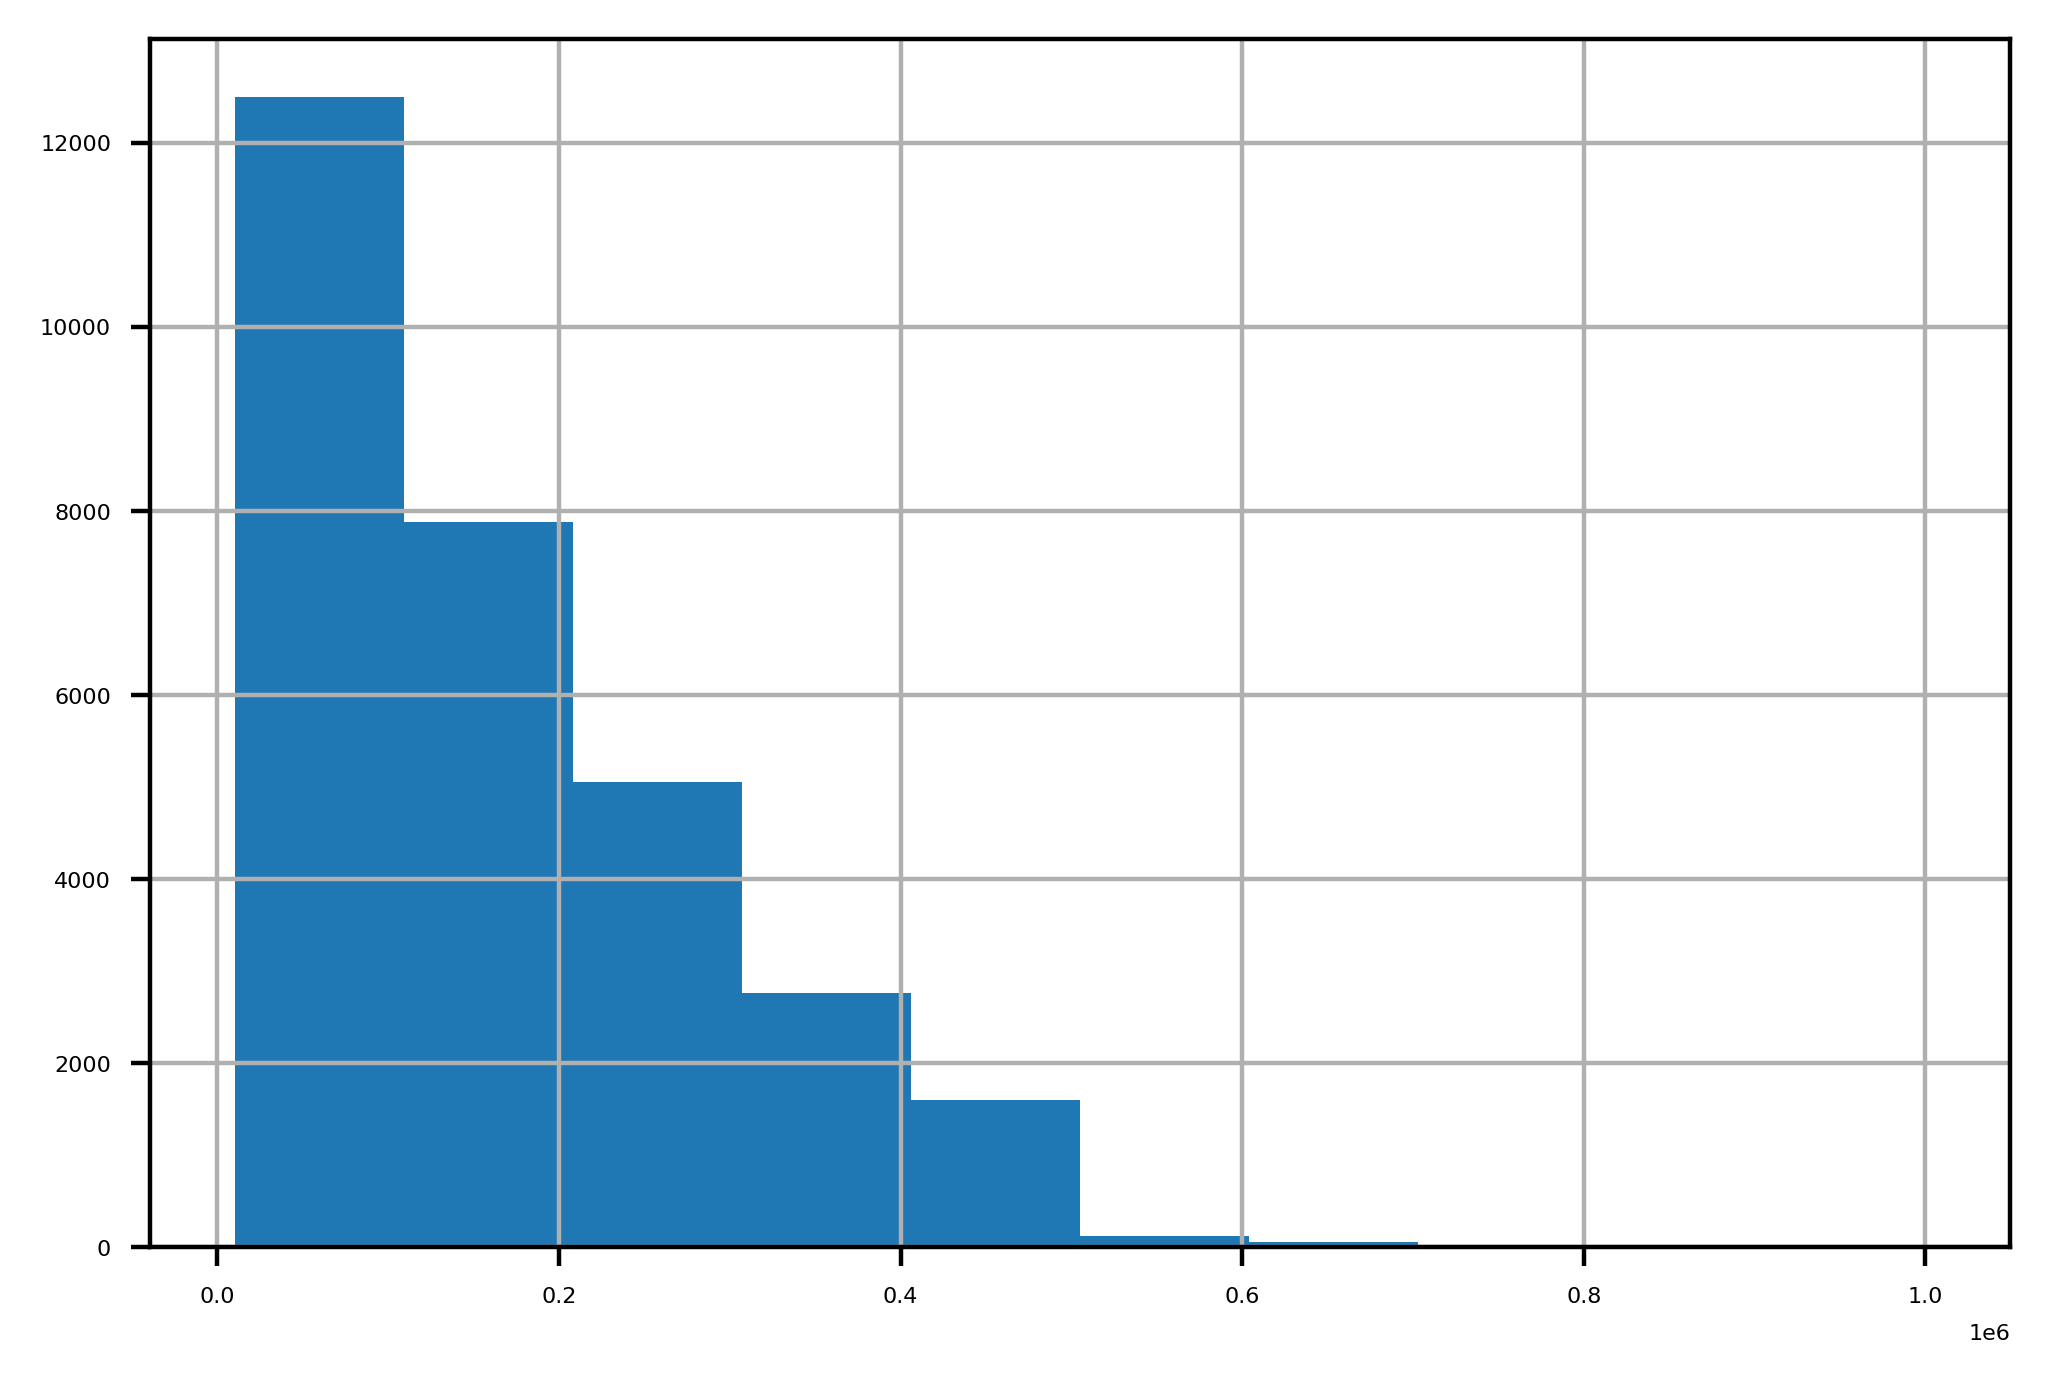

In [43]:
data['LIMIT_BAL'].hist()

#### Machine Learning

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['EDUCATION', 'PAY_1', 'LIMIT_BAL']].values, #columns to use / independent
                                                    data['default payment next month'], #variable to predict / dependent
                                                    test_size=.2, random_state=24) # size 20% - of the data to testing - X_test + y_test / 80% X_train
# size 20% - of the data to testing - X_test + y_test / 80% X_train
# 80 % (X_train) of EDUCATION, PAY_1 & LIMIT_BAL
# 20 % (X_test) of EDUCATION, PAY_1 & LIMIT_BAL
# 80 % (y_train) of default payment next month column (to predict)
# 20 % (y_test) of default payment next month column (to predict)

In [80]:
# 24000 rows to train the model
# 6000 rows to test the model

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 3)
(6000, 3)
(24000,)
(6000,)


##### 0 = 23364 / paying customers

##### 1 = 6636 / non-paying customers

there is no symmetry in the data, we must find an algorithm that adapts to this business need.

In [47]:
data['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

#### RandomForestClassifier

This algorithm can handle scenarios well when there are large differences in the data or no symmetry, e.g. payments and non-payments.

In [48]:
from sklearn.ensemble import RandomForestClassifier

bosque_aleatorio = RandomForestClassifier(n_estimators=100, random_state=24) #n_estimators = 100 = numbers of forest (the higher the number, the more accurate it can be, but the harder it is to train)

bosque_aleatorio.fit(X_train, y_train) #fit the model = values to get and train...

y_pred = bosque_aleatorio.predict(X_test) #variable to predict / prediction of values

#### show the predicted values and compare it with the values of the y_test

In [49]:
y_pred[:15]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

#### show the real values and compare it with the values of the y_pred

In [50]:
y_test[:15]

25706    0
2412     1
13346    1
23685    0
9943     0
28908    1
7167     0
25657    0
16167    0
3283     0
13379    0
10724    0
12366    0
5223     1
8781     1
Name: default payment next month, dtype: int64

##### Accuracy / ML / RandomForestClassifierModel

81.15 % of the data. So we can say that the model is quite good since it used more than 80% of the data. However, we can add other columns of interest to the model and it can affect the accuracy of the model as well.

In [51]:
from sklearn.metrics import accuracy_score

accury = accuracy_score(y_test, y_pred)
accury

0.8115

##### LogisticRegression

In [52]:
from sklearn import linear_model

logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = logit_model.predict(X_test)

In [54]:
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
y_test[:15]

25706    0
2412     1
13346    1
23685    0
9943     0
28908    1
7167     0
25657    0
16167    0
3283     0
13379    0
10724    0
12366    0
5223     1
8781     1
Name: default payment next month, dtype: int64

##### Accuracy / ML / LogiticRegression

In [56]:
accury = accuracy_score(y_test, y_pred)
accury

0.7738333333333334

##### Conclusion

The Logistic **Regression model (77.38% - accuracy)** is not very good for this data scenario unlike the **RandomForestClassifier model (81.15% - accuracy)**. 